# **Painting Dataset**

### **Data Description:**



### **Data Content:**


### **Data Dictionary:**

- ID = 
- Category = 
- Artist = 
- Title = 
- Year = 
- Image URL = 
- Painting Info URLe =
- Artist Info URL = 




#### Import libraries and read files

In [267]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle
from sklearn.neighbors import LocalOutlierFactor #Outliar handling

# Modeling process
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from colorthief import ColorThief

In [148]:
df = pd.read_csv("data/WikiArt-info.tsv", sep='\t')
df.head()

,ID,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL
0,58c6237dedc2c9c7dc0de1ae,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,1889,https://uploads3.wikiart.org/00123/images/char...,https://www.wikiart.org/en/charles-courtney-cu...,https://www.wikiart.org/en/charles-courtney-cu...
1,577280dfedc2cb3880f28e76,Neo-Expressionism,Keith Haring,The Marriage of Heaven and Hell,1984,https://uploads1.wikiart.org/images/keith-hari...,https://www.wikiart.org/en/keith-haring/the-ma...,https://www.wikiart.org/en/keith-haring
2,57727f2dedc2cb3880ed5fa9,Post-Impressionism,Jozsef Rippl-Ronai,Uncle Piacsek in front of the Black Sideboard,1906,https://uploads3.wikiart.org/images/j-zsef-rip...,https://www.wikiart.org/en/jozsef-rippl-ronai/...,https://www.wikiart.org/en/jozsef-rippl-ronai
3,58d1240cedc2c94f900fc610,Cubism,Vadym Meller,Monk. For the Play &#39;Mazeppa&#39;,1920,https://uploads2.wikiart.org/00124/images/vady...,https://www.wikiart.org/en/vadym-meller/monk-f...,https://www.wikiart.org/en/vadym-meller
4,57727de7edc2cb3880e91f26,Romanticism,David Wilkie,The Defence of Sarago&#231;a,1828,https://uploads6.wikiart.org/images/david-wilk...,https://www.wikiart.org/en/david-wilkie/the-de...,https://www.wikiart.org/en/david-wilkie


In [132]:
df.columns

Index(['ID', 'Category', 'Artist', 'Title', 'Year', 'Image URL',
       'Painting Info URL', 'Artist Info URL'],
      dtype='object')

In [178]:
df.shape

(4119, 8)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 4119 non-null   object
 1   Category           4119 non-null   object
 2   Artist             4119 non-null   object
 3   Title              4119 non-null   object
 4   Year               4119 non-null   object
 5   Image URL          4119 non-null   object
 6   Painting Info URL  4119 non-null   object
 7   Artist Info URL    4119 non-null   object
dtypes: object(8)
memory usage: 257.6+ KB


In [181]:
df.Artist.value_counts()

Eyvind Earle             31
Pietro Perugino          23
Sam Francis              23
Mark Rothko              19
Willi Baumeister         19
                         ..
Gianfranco Baruchello     1
Lennart Rodhe             1
Arman                     1
Gerhard Richter           1
Oleg Holosiy              1
Name: Artist, Length: 1003, dtype: int64

/usr/local/python/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


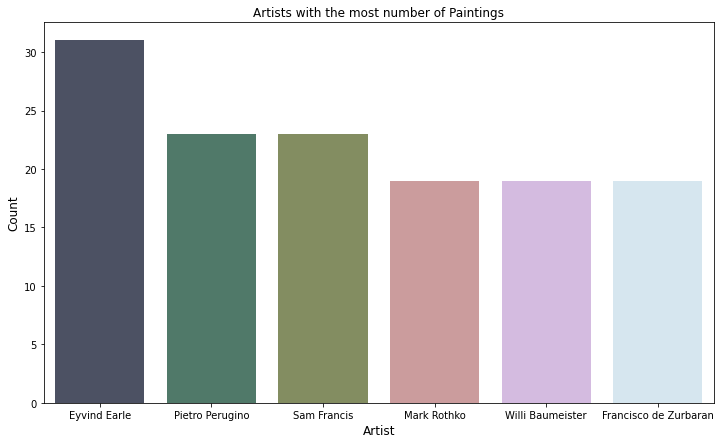

In [196]:
# Plotting a bar graph of the artists with the most paintings in the dataset
artist_values  = df['Artist'].value_counts()
artist_count = artist_values[:6,]
plt.figure(figsize=(12,7))
sns.barplot(artist_count.index, artist_count.values, alpha=0.8, palette="cubehelix")
plt.title('Artists with the most number of Paintings')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Artist', fontsize=12)
# plt.xticks(rotation=90)
plt.show()

/usr/local/python/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


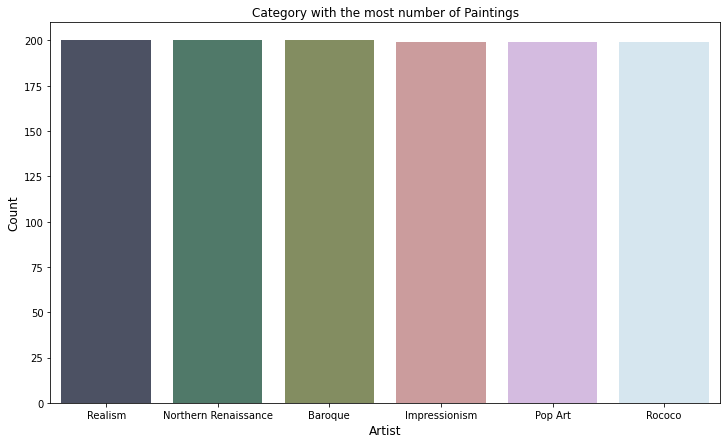

In [261]:
# Plotting a bar graph of the artists with the most paintings in the dataset
artist_values  = df['Artist'].value_counts()
artist_count = artist_values[:6,]
plt.figure(figsize=(12,7))
sns.barplot(artist_count.index, artist_count.values, alpha=0.8, palette="cubehelix")
plt.title('Artists with the most number of Paintings')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Artist', fontsize=12)
# plt.xticks(rotation=90)
plt.show()

In [179]:
df.isnull().sum()

ID                   0
Category             0
Artist               0
Title                0
Year                 0
Image URL            0
Painting Info URL    0
Artist Info URL      0
dtype: int64

In [134]:
df.Year.value_counts()

1964         81
1962         68
1959         61
1963         59
1967         58
             ..
1475-1478     1
1495-1515     1
1913-1915     1
1747-1749     1
1584          1
Name: Year, Length: 656, dtype: int64

In [135]:
cat_1964 = df[(df.Year == '1964')]

In [136]:
cat_1964.Category

20         Neo-Expressionism
139             Art Informel
174        Neo-Expressionism
186               Minimalism
205               Minimalism
                ...         
3828            Art Informel
3893     Lyrical Abstraction
3902    Color Field Painting
4087                 Pop Art
4096                 Pop Art
Name: Category, Length: 81, dtype: object

In [97]:
df[['Category','Year']].value_counts()


Category           Year           
Neoclassicism      XVIII-XIX cent.    33
Minimalism         1967               27
Surrealism         1937               25
Minimalism         1968               23
                   1969               22
                                      ..
                   1967-1968           1
                   1970                1
Neo-Expressionism  1950                1
                   1951                1
Abstract Art       1883                1
Length: 1219, dtype: int64

In [ ]:
Modern = ['Impressionism','Pop Art', 'Neo-Expressionism', 'Art Informel', 'Post-Impressionism','Surrealism','Lyrical Abstraction',
'Abstract Expressionism','Abstract Art','Cubism','Magic Realism']

In [ ]:
Western = ['Realism','Northern Renaissance','Baroque', 'Rococo', 'Romanticism', 'Expressionism','Neoclassicism','Early Renaissance',
'High Renaissance']

In [ ]:
Contemporary = ['Minimalism' ]

In [81]:
Modern_df = df[(df.Category =='Cubism') | (df.Category =='Impressionism') |(df.Category =='Surrealism') ]

In [82]:
Modern

,ID,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL
0,58c6237dedc2c9c7dc0de1ae,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,1889,https://uploads3.wikiart.org/00123/images/char...,https://www.wikiart.org/en/charles-courtney-cu...,https://www.wikiart.org/en/charles-courtney-cu...
3,58d1240cedc2c94f900fc610,Cubism,Vadym Meller,Monk. For the Play &#39;Mazeppa&#39;,1920,https://uploads2.wikiart.org/00124/images/vady...,https://www.wikiart.org/en/vadym-meller/monk-f...,https://www.wikiart.org/en/vadym-meller
14,577284a7edc2cb3880fe813a,Cubism,Francis Picabia,Dances at the Spring,1912,https://uploads2.wikiart.org/images/francis-pi...,https://www.wikiart.org/en/francis-picabia/dan...,https://www.wikiart.org/en/francis-picabia
28,5772819cedc2cb3880f501c7,Surrealism,Eileen Agar,The Reaper,1938,https://uploads6.wikiart.org/images/eileen-aga...,https://www.wikiart.org/en/eileen-agar/the-rea...,https://www.wikiart.org/en/eileen-agar
44,57727f7bedc2cb3880ee1357,Cubism,Amadeo de Souza-Cardoso,Landscape,1912,https://uploads8.wikiart.org/images/amadeo-de-...,https://www.wikiart.org/en/amadeo-de-souza-car...,https://www.wikiart.org/en/amadeo-de-souza-car...
...,...,...,...,...,...,...,...,...
4039,577286e4edc2cb3880058bf0,Cubism,Wyndham Lewis,Creation Myth,1927,https://uploads2.wikiart.org/images/wyndham-le...,https://www.wikiart.org/en/wyndham-lewis/creat...,https://www.wikiart.org/en/wyndham-lewis
4046,57728401edc2cb3880fc8433,Impressionism,Marie Bracquemond,Woman with an Umbrella,1880,https://uploads6.wikiart.org/images/marie-brac...,https://www.wikiart.org/en/marie-bracquemond/w...,https://www.wikiart.org/en/marie-bracquemond
4081,57727dacedc2cb3880e872bb,Surrealism,Andre Masson,Pupae to Toledo,1935,https://uploads4.wikiart.org/images/andre-mass...,https://www.wikiart.org/en/andre-masson/no-nam...,https://www.wikiart.org/en/andre-masson
4091,57727dadedc2cb3880e8733b,Surrealism,Andre Masson,Iconic views of Toledo,1936,https://uploads4.wikiart.org/images/andre-mass...,https://www.wikiart.org/en/andre-masson/no-nam...,https://www.wikiart.org/en/andre-masson


#### Data Exploring:

In [219]:
df.columns

Index(['ID', 'Category', 'Artist', 'Title', 'Year', 'Image URL',
       'Painting Info URL', 'Artist Info URL'],
      dtype='object')

In [256]:
top5artists = df['Artist'].value_counts().head(5)
top5artists

Eyvind Earle        31
Pietro Perugino     23
Sam Francis         23
Mark Rothko         19
Willi Baumeister    19
Name: Artist, dtype: int64

In [263]:
df[df.Artist == 'Eyvind Earle']

,ID,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL
154,57727e13edc2cb3880e9b45b,Magic Realism,Eyvind Earle,My Soul,2000,https://uploads4.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/my-sou...,https://www.wikiart.org/en/eyvind-earle
629,57727e10edc2cb3880e9b02d,Magic Realism,Eyvind Earle,Evening Magic,2000,https://uploads1.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/evenin...,https://www.wikiart.org/en/eyvind-earle
652,57727e15edc2cb3880e9b893,Magic Realism,Eyvind Earle,The Wave,1990,https://uploads5.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/the-wa...,https://www.wikiart.org/en/eyvind-earle
729,57727e17edc2cb3880e9ba8b,Magic Realism,Eyvind Earle,Moon Bath,1988,https://uploads6.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/moon-b...,https://www.wikiart.org/en/eyvind-earle
976,57727e18edc2cb3880e9bbe1,Magic Realism,Eyvind Earle,Enchanted Coast,1980,https://uploads3.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/enchan...,https://www.wikiart.org/en/eyvind-earle
1152,57727e10edc2cb3880e9b01b,Magic Realism,Eyvind Earle,Even Tide,1994,https://uploads6.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/even-t...,https://www.wikiart.org/en/eyvind-earle
1270,57727e12edc2cb3880e9b287,Magic Realism,Eyvind Earle,Hidden Hills,XX-XXI cent.,https://uploads4.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/hidden...,https://www.wikiart.org/en/eyvind-earle
1586,57727e18edc2cb3880e9bbf3,Magic Realism,Eyvind Earle,Blue Pine,1980,https://uploads6.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/blue-p...,https://www.wikiart.org/en/eyvind-earle
1600,57727e15edc2cb3880e9b839,Magic Realism,Eyvind Earle,Sunset Magic,1996,https://uploads0.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/sunset...,https://www.wikiart.org/en/eyvind-earle
1608,57727e12edc2cb3880e9b1f7,Magic Realism,Eyvind Earle,Grazing in Peace,1970,https://uploads4.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/grazin...,https://www.wikiart.org/en/eyvind-earle


In [253]:
topArtist1 = df[df.Artist == 'Eyvind Earle']
topArtist1

,ID,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL
154,57727e13edc2cb3880e9b45b,Magic Realism,Eyvind Earle,My Soul,2000,https://uploads4.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/my-sou...,https://www.wikiart.org/en/eyvind-earle
629,57727e10edc2cb3880e9b02d,Magic Realism,Eyvind Earle,Evening Magic,2000,https://uploads1.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/evenin...,https://www.wikiart.org/en/eyvind-earle
652,57727e15edc2cb3880e9b893,Magic Realism,Eyvind Earle,The Wave,1990,https://uploads5.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/the-wa...,https://www.wikiart.org/en/eyvind-earle
729,57727e17edc2cb3880e9ba8b,Magic Realism,Eyvind Earle,Moon Bath,1988,https://uploads6.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/moon-b...,https://www.wikiart.org/en/eyvind-earle
976,57727e18edc2cb3880e9bbe1,Magic Realism,Eyvind Earle,Enchanted Coast,1980,https://uploads3.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/enchan...,https://www.wikiart.org/en/eyvind-earle
1152,57727e10edc2cb3880e9b01b,Magic Realism,Eyvind Earle,Even Tide,1994,https://uploads6.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/even-t...,https://www.wikiart.org/en/eyvind-earle
1270,57727e12edc2cb3880e9b287,Magic Realism,Eyvind Earle,Hidden Hills,XX-XXI cent.,https://uploads4.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/hidden...,https://www.wikiart.org/en/eyvind-earle
1586,57727e18edc2cb3880e9bbf3,Magic Realism,Eyvind Earle,Blue Pine,1980,https://uploads6.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/blue-p...,https://www.wikiart.org/en/eyvind-earle
1600,57727e15edc2cb3880e9b839,Magic Realism,Eyvind Earle,Sunset Magic,1996,https://uploads0.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/sunset...,https://www.wikiart.org/en/eyvind-earle
1608,57727e12edc2cb3880e9b1f7,Magic Realism,Eyvind Earle,Grazing in Peace,1970,https://uploads4.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/grazin...,https://www.wikiart.org/en/eyvind-earle


In [251]:
topArtist1.Category.value_counts()

Magic Realism    31
Name: Category, dtype: int64

In [262]:
df['Category'].groupby(df['Artist']).value_counts().head(10)

Artist              Category              
Aaron Siskind       Abstract Expressionism    2
Abidin Dino         Surrealism                1
Abraham Manievich   Post-Impressionism        2
                    Cubism                    1
Abraham van Strij   Neoclassicism             8
Ad Reinhardt        Abstract Art              2
                    Color Field Painting      2
Adolph Menzel       Realism                   9
Adriaen Brouwer     Baroque                   6
Adriaen van Ostade  Baroque                   5
Name: Category, dtype: int64

In [272]:
# testing domanint color

test = df['Painting Info URL'].values[0]
test

'https://www.wikiart.org/en/charles-courtney-curran/in-the-luxembourg-garden-1889'

In [290]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

# # html = urlopen('https://en.wikipedia.org/wiki/Peter_Jeffrey_(RAAF_officer)')
bs = BeautifulSoup(test, 'html.parser')
images = bs.find_all('img', {'src':re.compile('.jpg')})

for image in images: 
    print(image['src']+'\n')

In [279]:
import io
import requests
from PIL import Image
r = requests.get(images, stream=True)
aux_im = Image.open(io.BytesIO(r.content))

InvalidURL: Failed to parse: []

In [275]:


im = Image.open(requests.get(test, stream=True).raw)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f270c4b2390>

In [273]:
color_thief = ColorThief(test)
# get the dominant color
dominant_color = color_thief.get_color(quality=1)

FileNotFoundError: [Errno 2] No such file or directory: 'https://www.wikiart.org/en/charles-courtney-curran/in-the-luxembourg-garden-1889'